In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

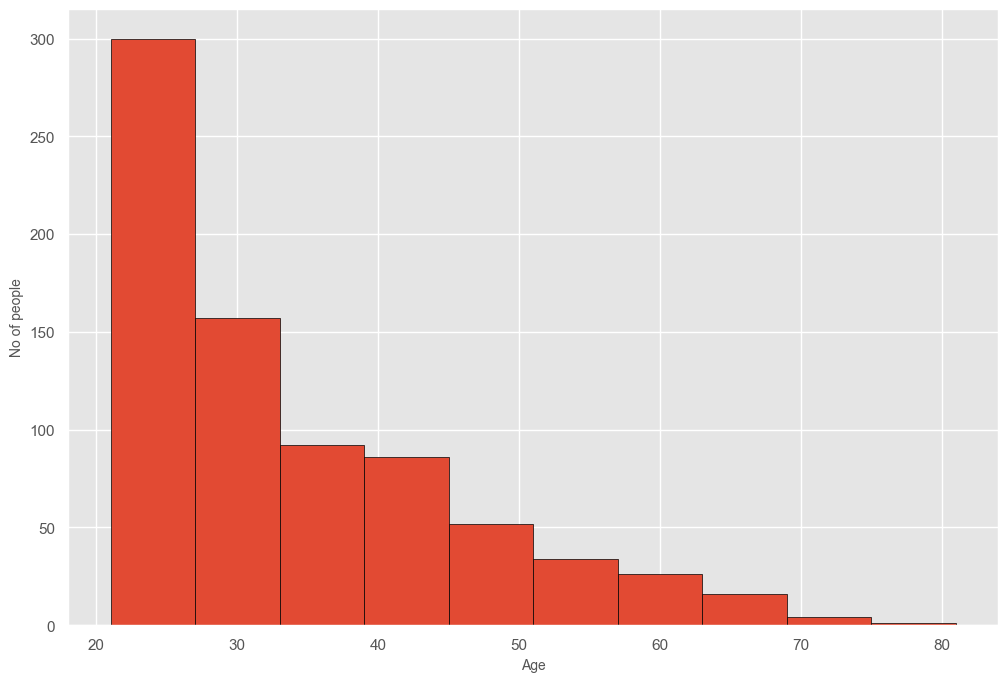

In [9]:
plt.figure(figsize=(12,8))
plt.xlabel('Age',fontsize=10)
plt.ylabel('No of people',fontsize=10)
df['Age'].hist(edgecolor='black')
plt.show()


In [10]:
print('MAX AGE : '+str(df['Age'].max()))
print('MIN AGE : '+str(df['Age'].min()))

MAX AGE : 81
MIN AGE : 21


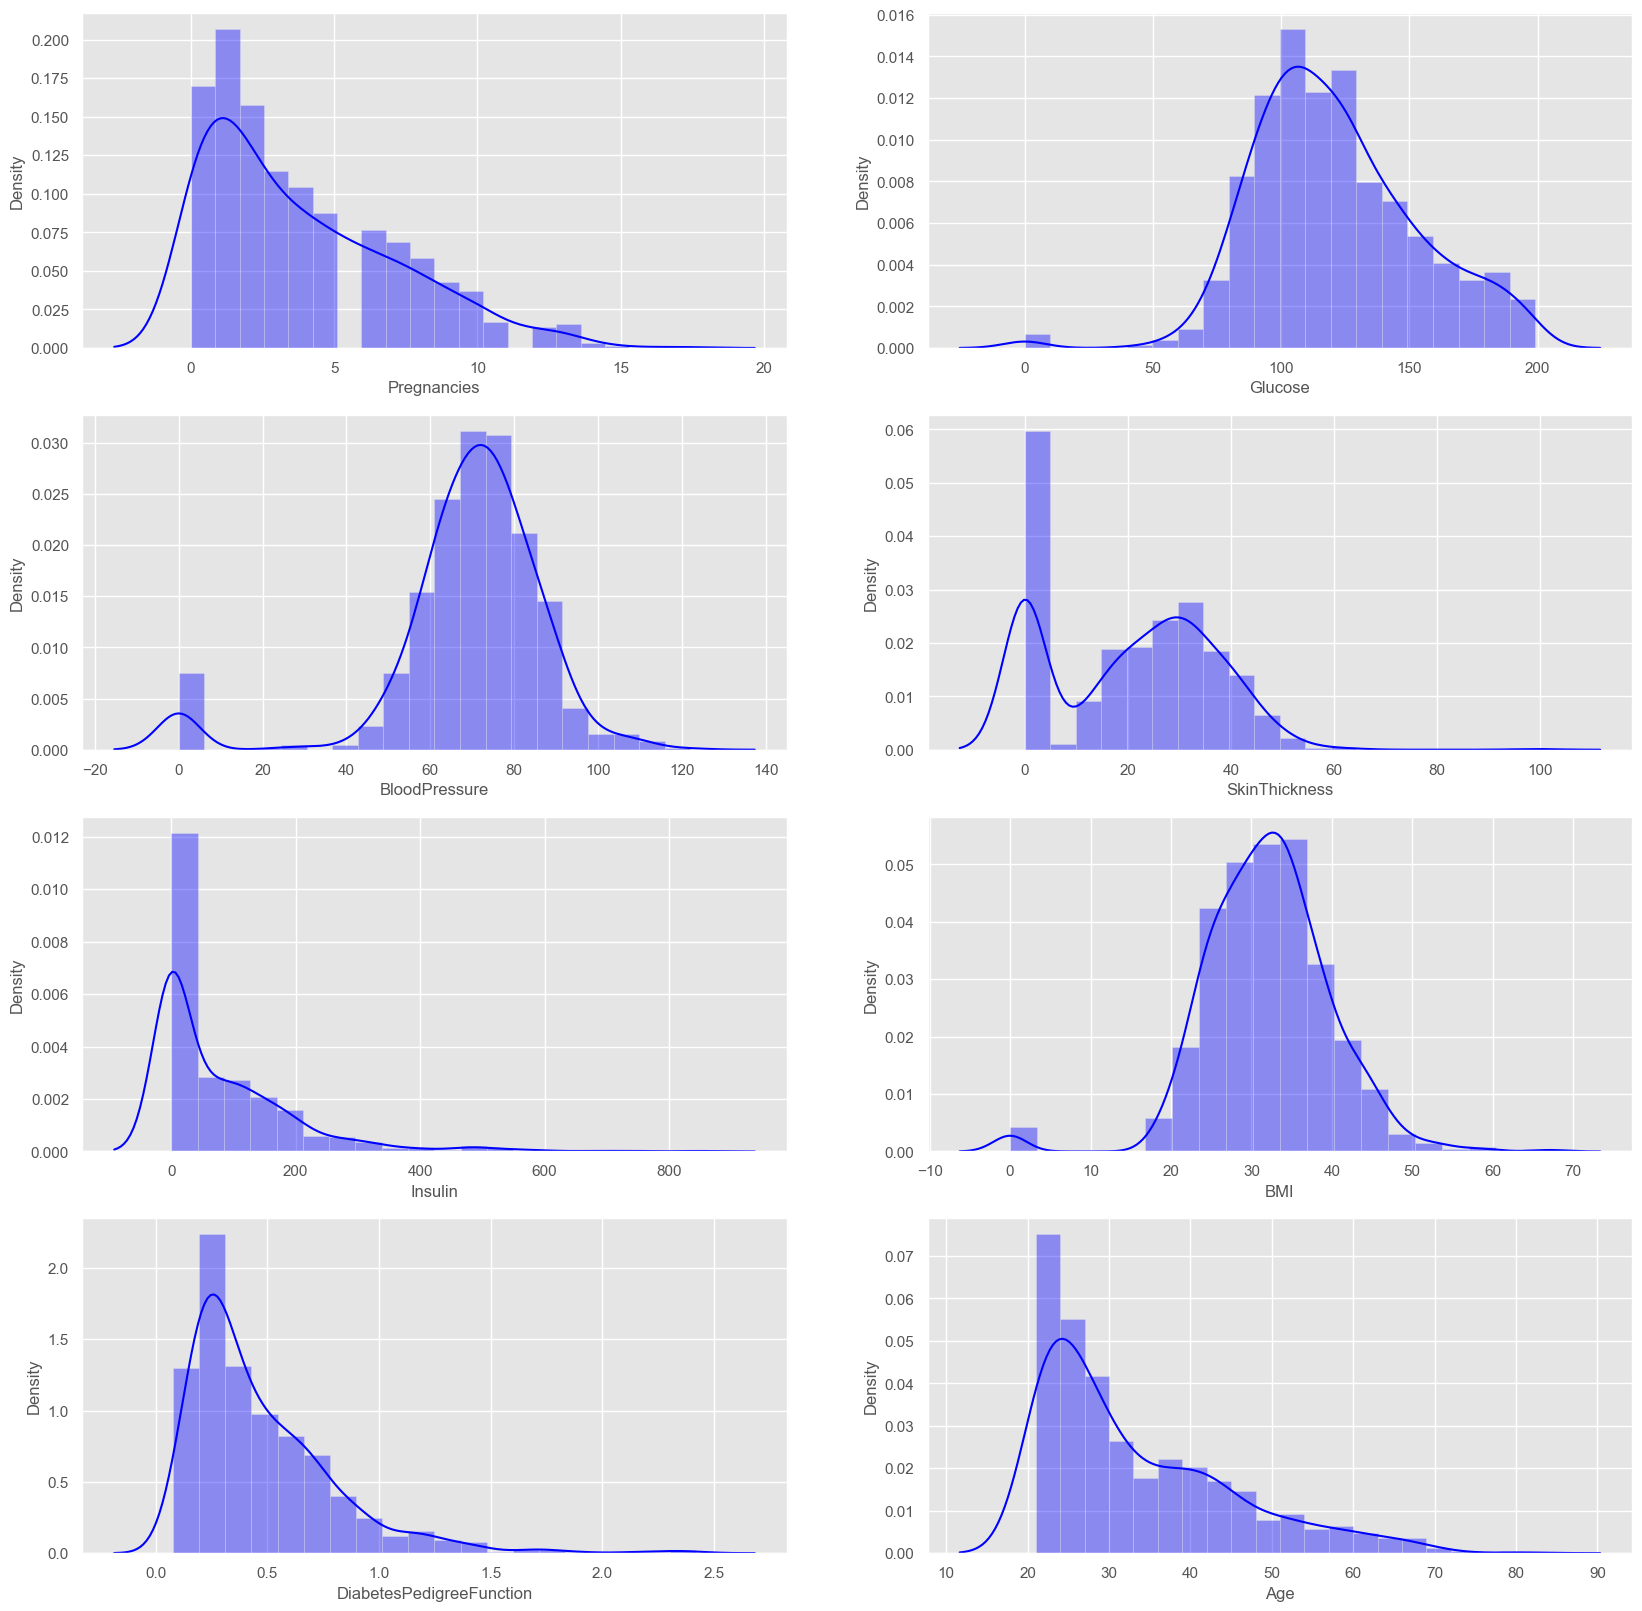

In [11]:
fig,ax = plt.subplots(4,2,figsize=(20,20))
sns.distplot(df.Pregnancies,bins=20,ax=ax[0,0],color='blue')
sns.distplot(df.Glucose,bins=20,ax=ax[0,1],color='blue')
sns.distplot(df.BloodPressure,bins=20,ax=ax[1,0],color='blue')
sns.distplot(df.SkinThickness,bins=20,ax=ax[1,1],color='blue')
sns.distplot(df.Insulin,bins=20,ax=ax[2,0],color='blue')
sns.distplot(df.BMI,bins=20,ax=ax[2,1],color='blue')
sns.distplot(df.DiabetesPedigreeFunction,bins=20,ax=ax[3,0],color='blue')
sns.distplot(df.Age,bins=20,ax=ax[3,1  ],color='blue')
plt.show()

In [12]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
df.groupby('Outcome').agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [14]:
df.groupby('Outcome').agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [15]:
df.groupby('Outcome').agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [16]:
df.groupby('Outcome').agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [17]:
df.groupby('Outcome').agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [18]:
df.groupby('Outcome').agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


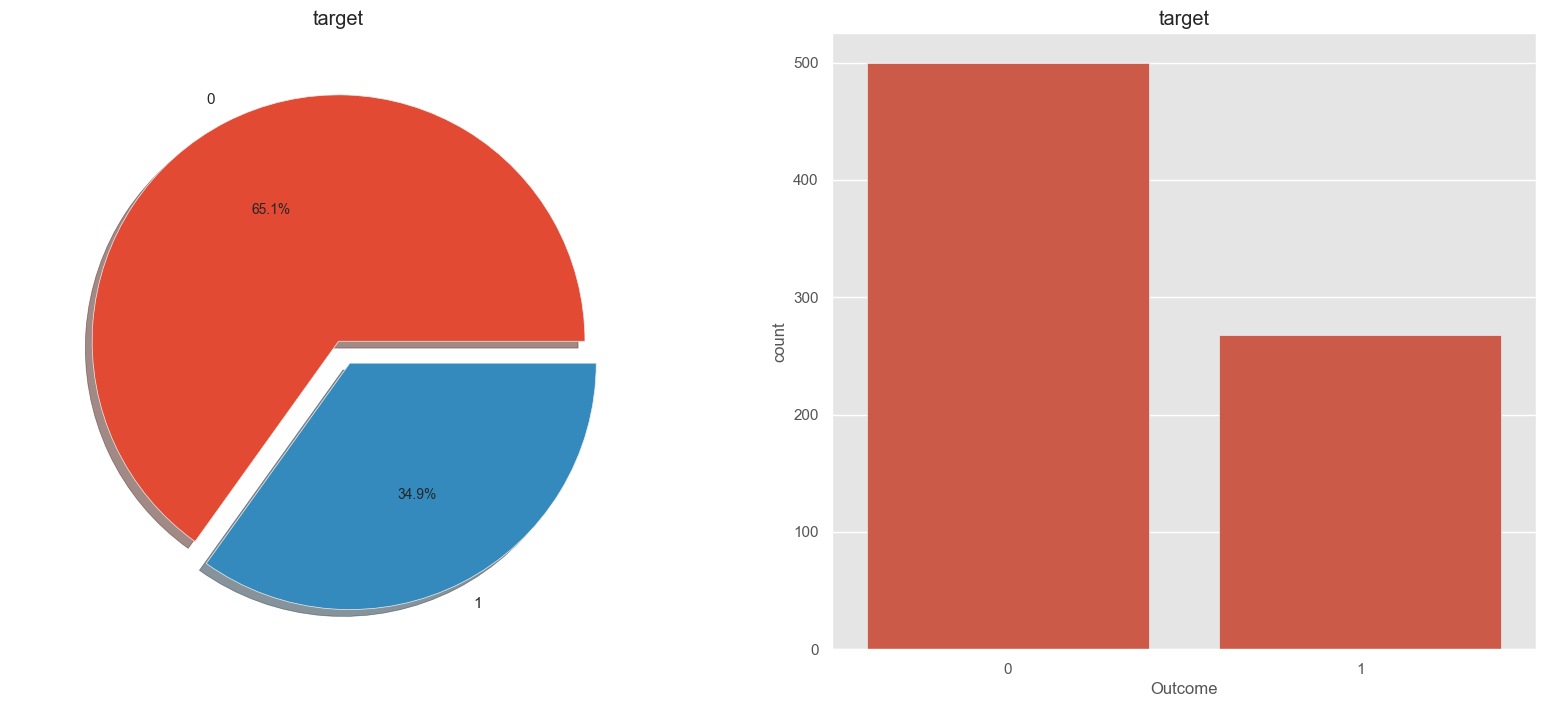

In [19]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel(' ')
sns.countplot(x='Outcome',data=df,ax=ax[1])
ax[1].set_title('target')
plt.show()


In [20]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


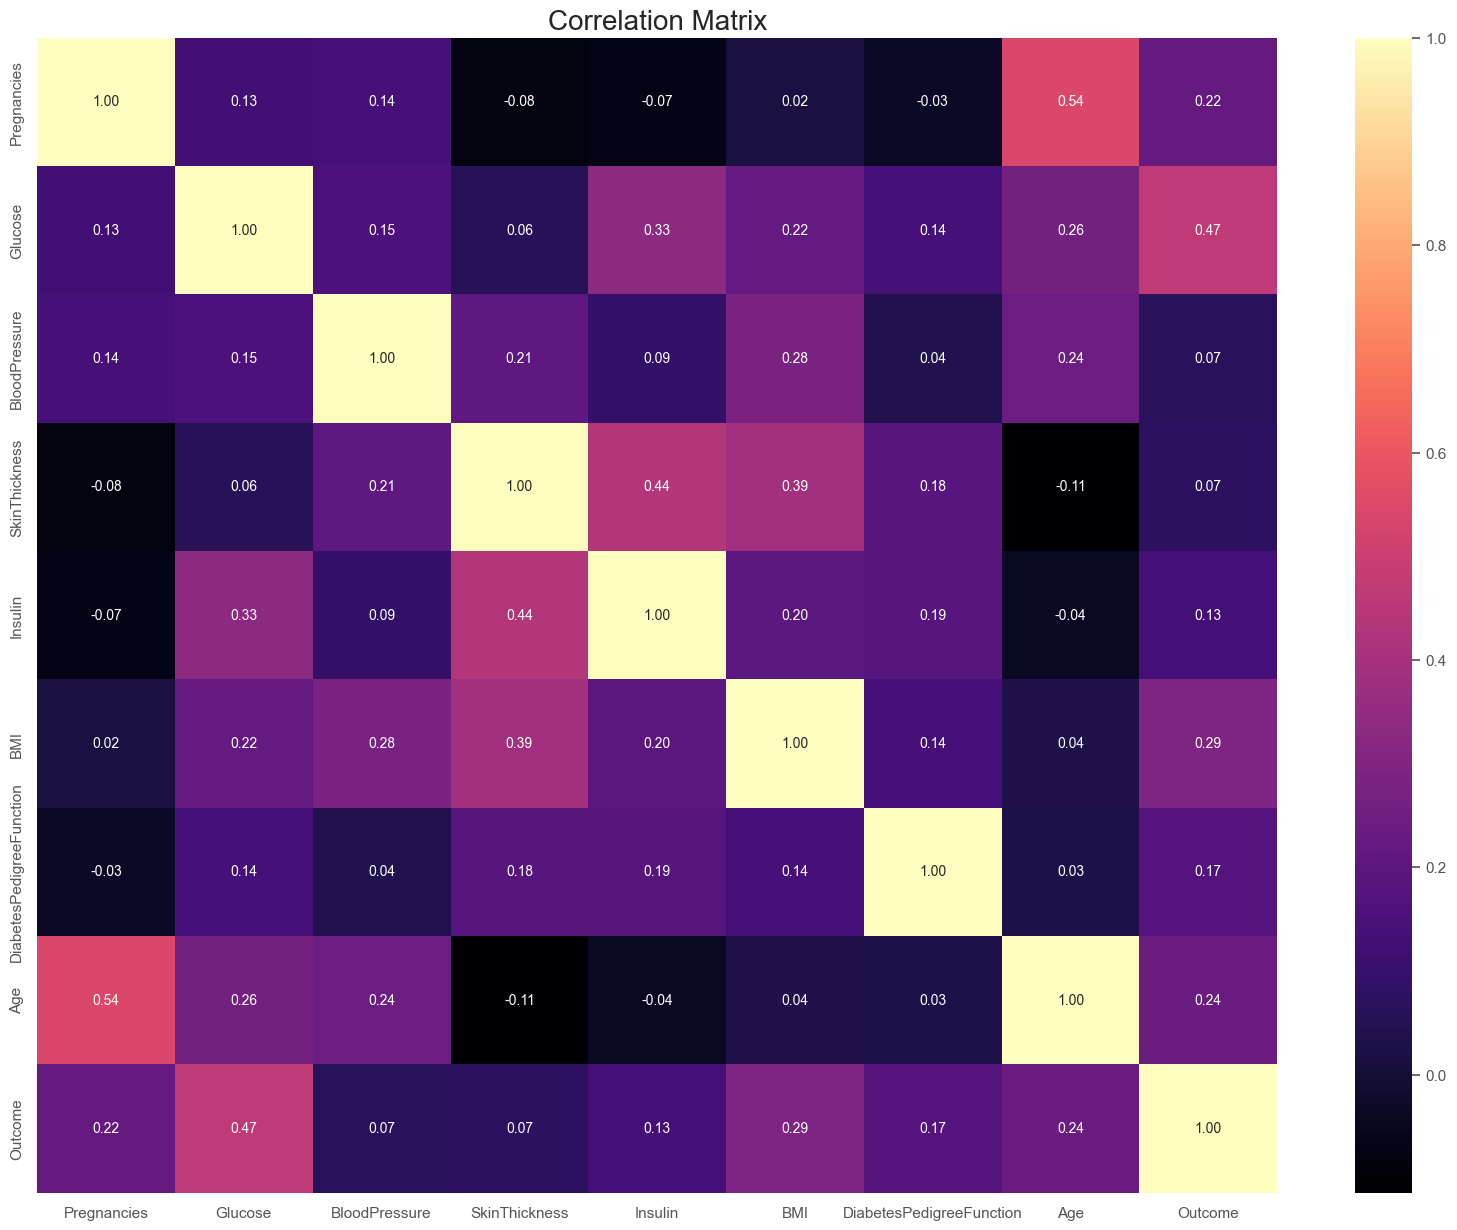

In [21]:
fig,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(),annot=True,fmt='.2f',ax=ax,cmap='magma')
ax.set_title('Correlation Matrix',fontsize=20)
plt.show()


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,np.nan)

In [25]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [26]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: >

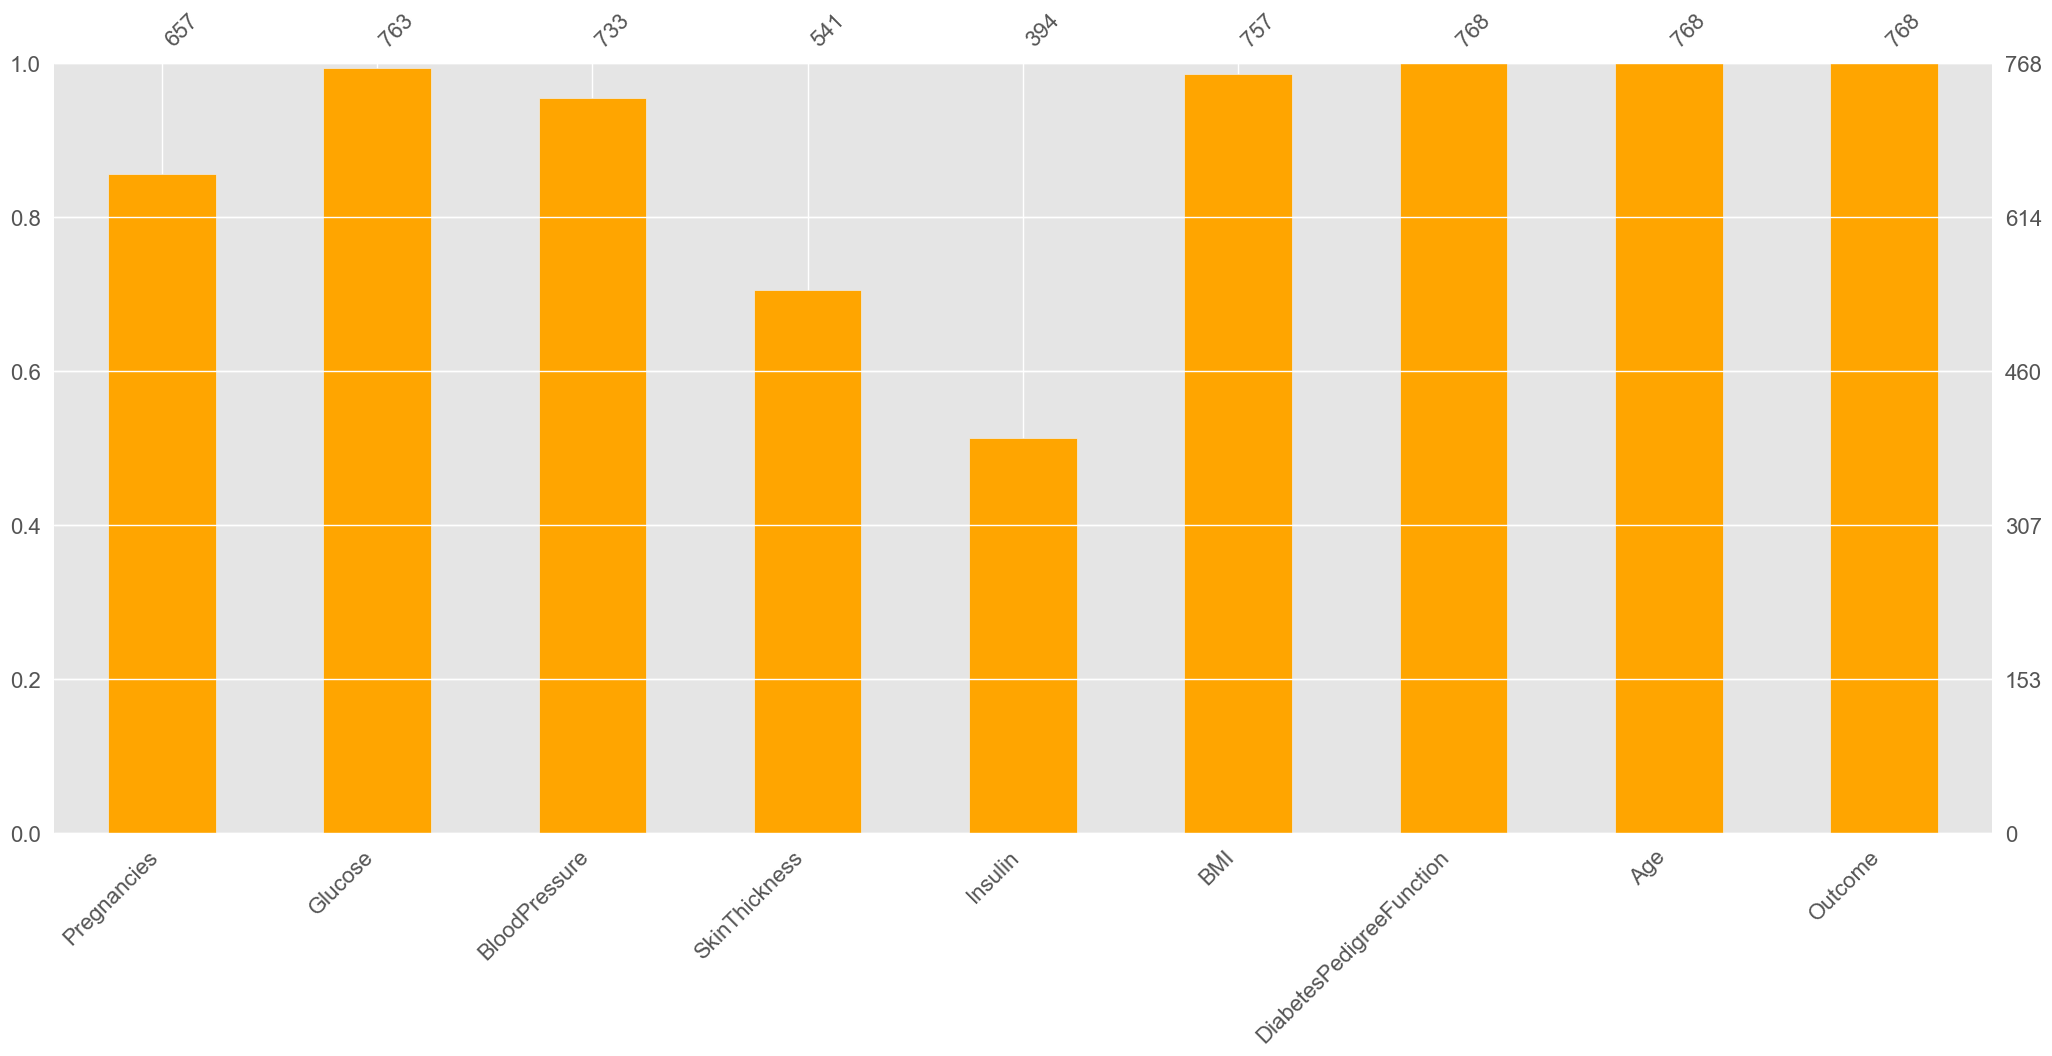

In [27]:
import missingno as msno
msno.bar(df,color='orange')

In [28]:
def median_target(var):
    temp =df[df[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [29]:
columns = df.columns
columns = columns.drop('Outcome')
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()),i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()),i] = median_target(i)[i][1]

In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

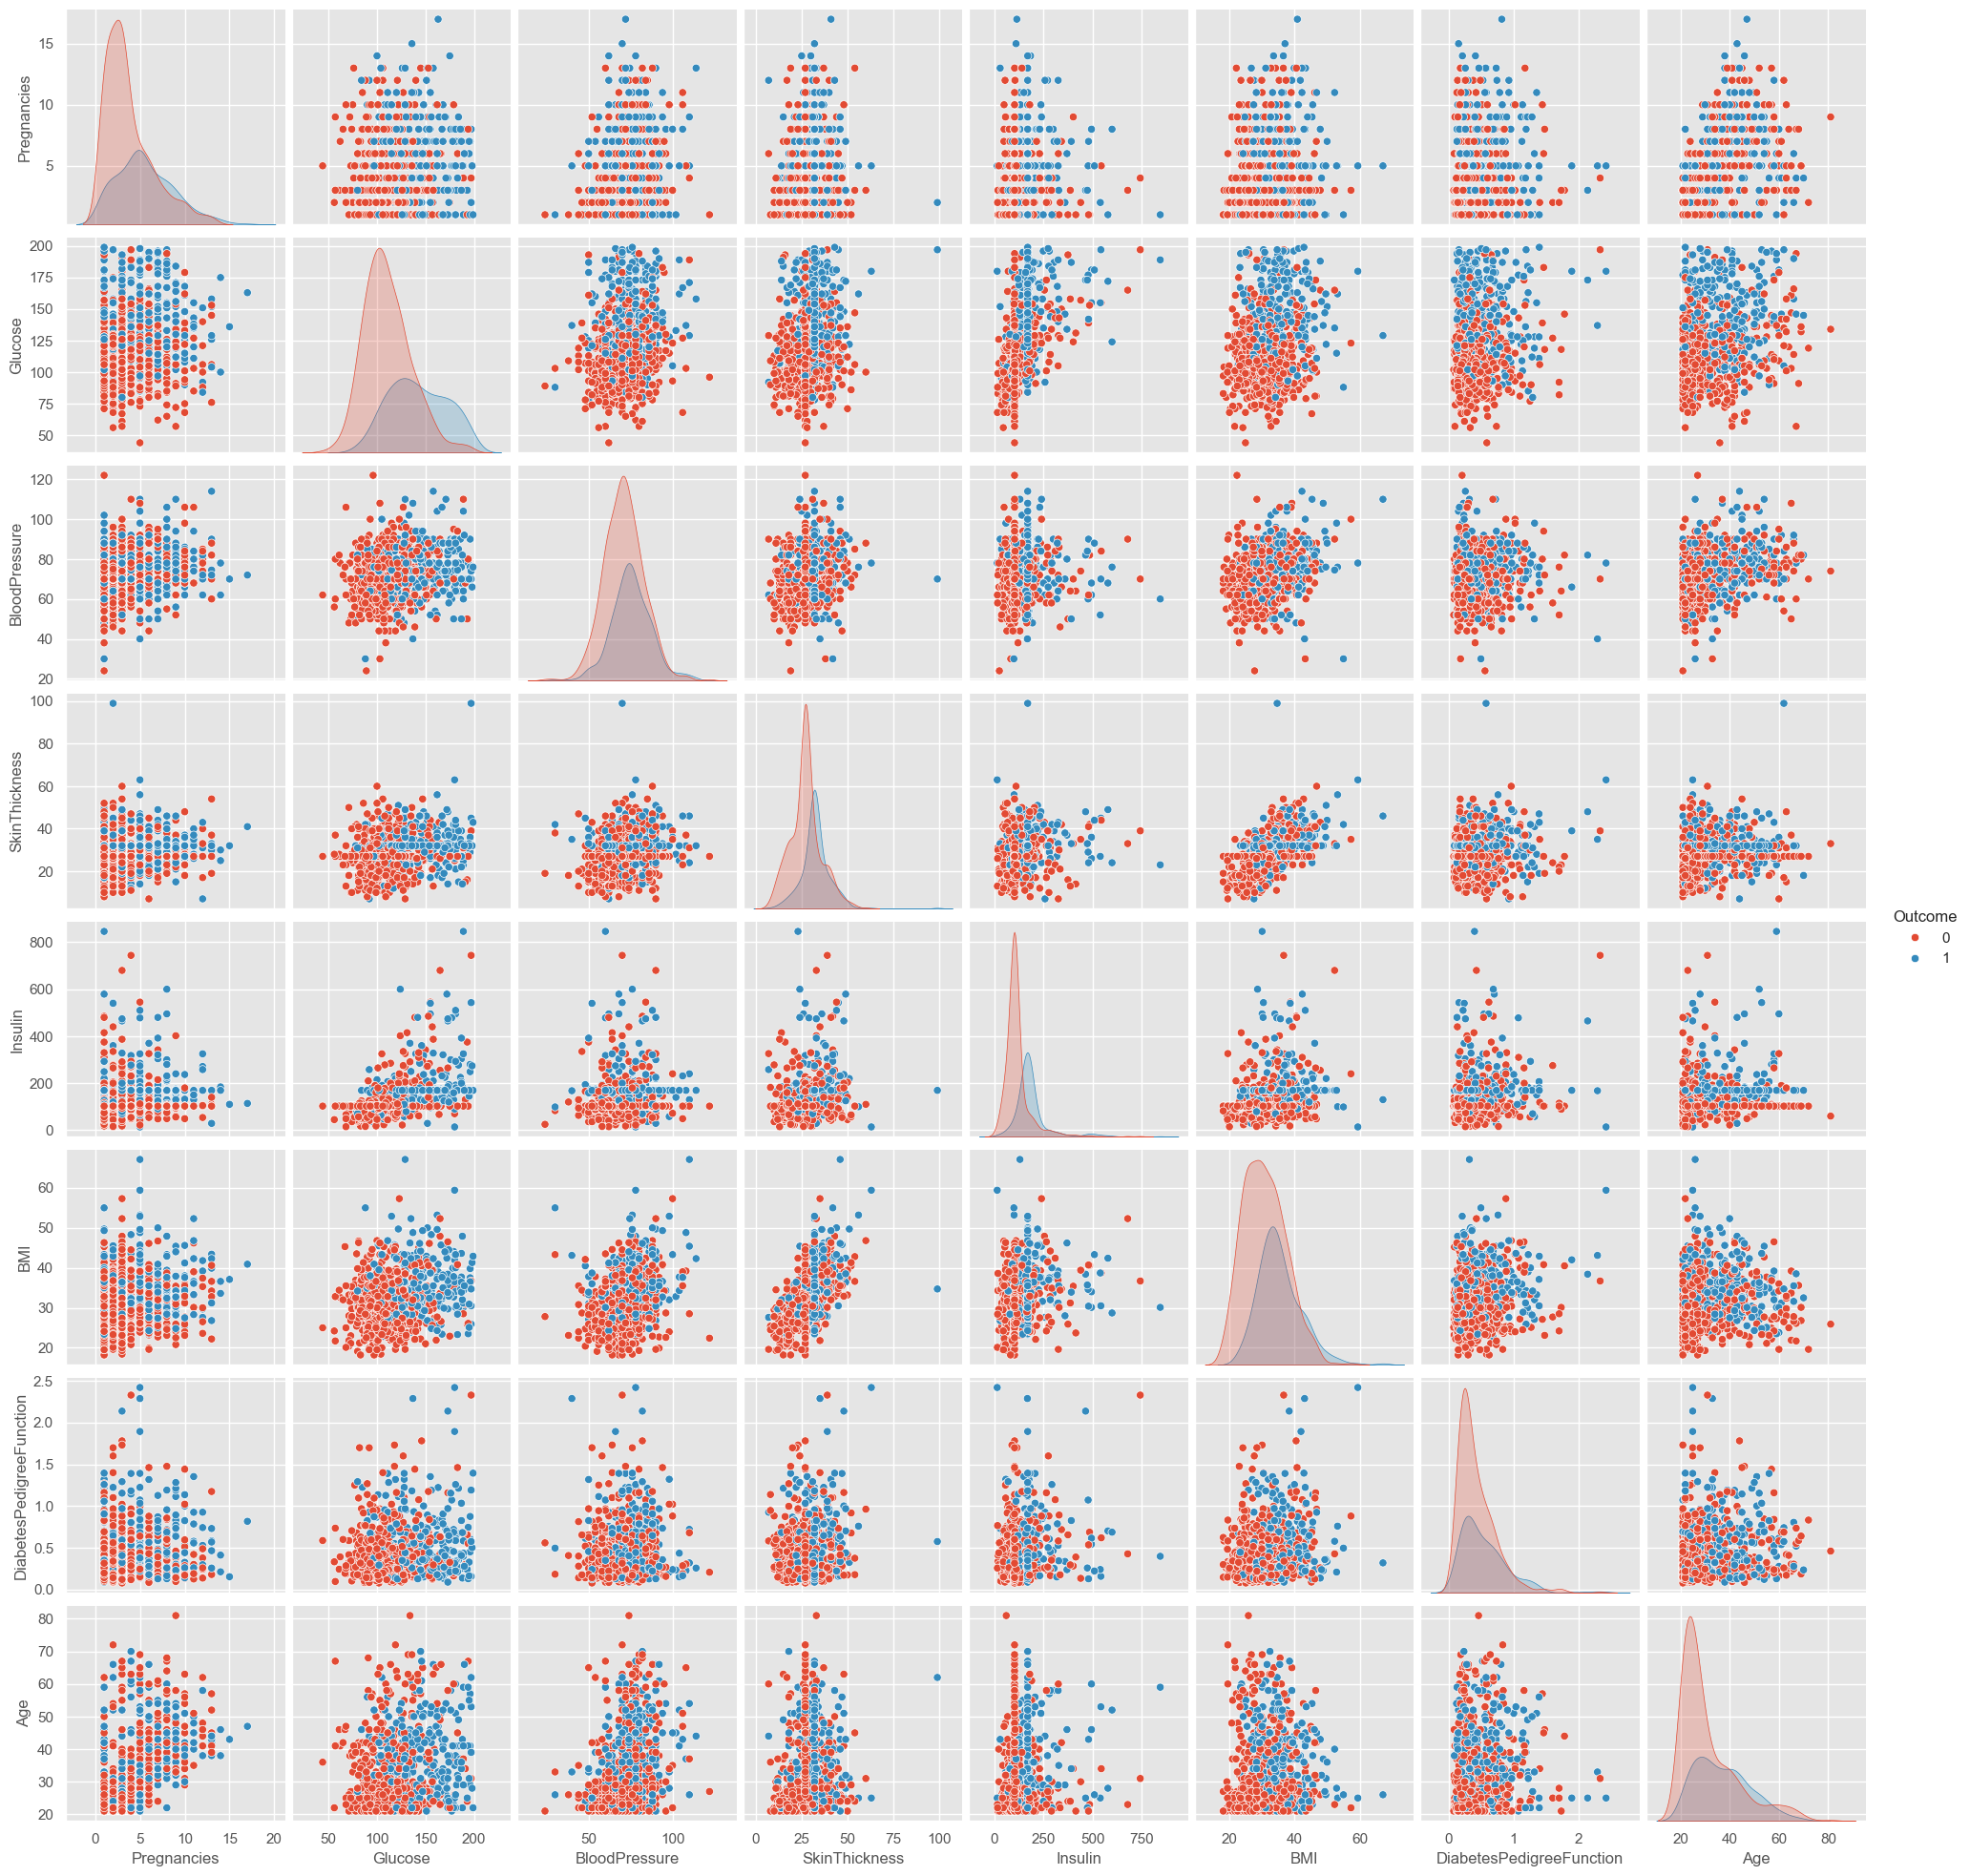

In [32]:
p = sns.pairplot(df,hue='Outcome')

In [33]:
for feature in df:
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    if df[(df[feature] > upper)].any(axis = None):
        print(feature,'yes')
    else:
        print(feature,'no')

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

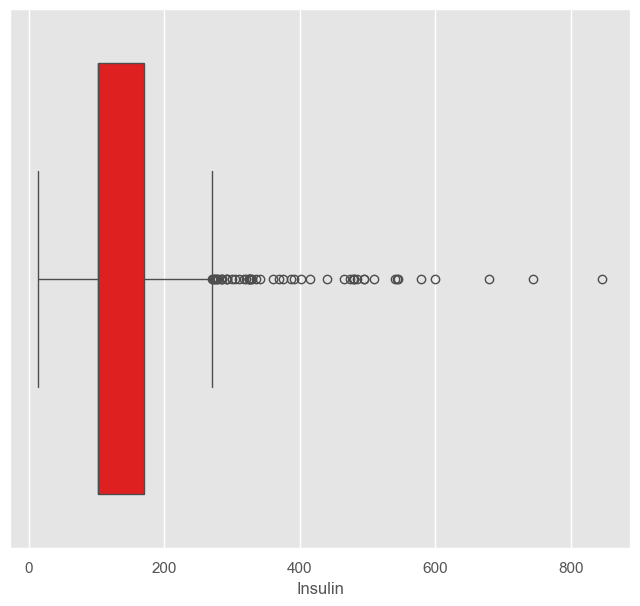

In [34]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['Insulin'],color='red')

In [35]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df['Insulin']>upper,"Insulin"] = upper

<Axes: xlabel='Insulin'>

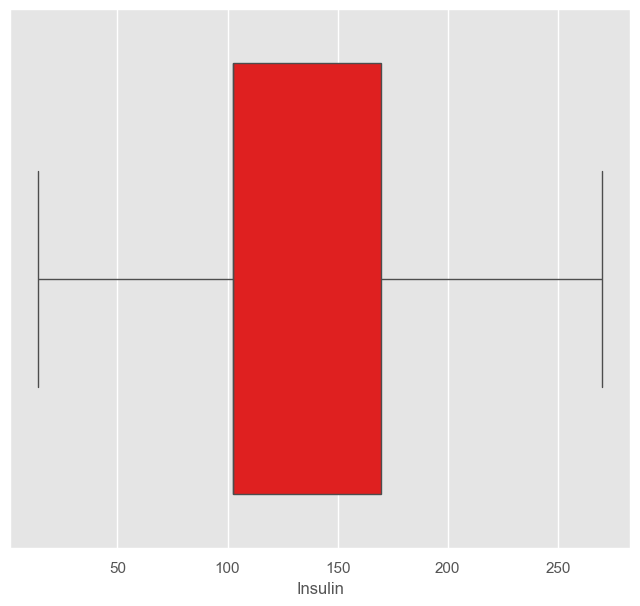

In [36]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['Insulin'],color='red')

In [37]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df['BloodPressure']>upper,"BloodPressure"] = upper

<Axes: xlabel='BloodPressure'>

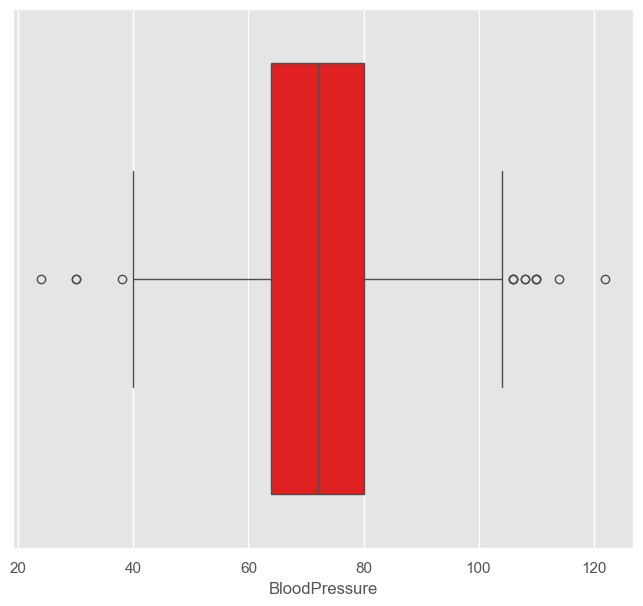

In [38]:
plt.figure(figsize=(8,7))
sns.boxplot(x=df['BloodPressure'],color='red')

In [39]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
y_pred = lof.fit_predict(df.drop('Outcome', axis=1))
df['OutlierFlag'] = (y_pred == -1).astype(int)
df = pd.get_dummies(df, columns=['OutlierFlag'], dtype=int)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0    169.5  33.6   
1          1.0     85.0           66.0           29.0    102.5  26.6   
2          8.0    183.0           64.0           32.0    169.5  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          5.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  OutlierFlag_0  OutlierFlag_1  
0                     0.627   50        1              1              0  
1                     0.351   31        0              1              0  
2                     0.672   32        1              1              0  
3                     0.167   21        0              1              0  
4                     2.288   33        1              1              0  


In [41]:
threshold = np.sort(df_scores)[7]

NameError: name 'df_scores' is not defined

In [ ]:
threshold

np.float64(-1.7353248886154184)

In [ ]:
outlier = df_scores >threshold


In [ ]:
df=df[outlier]

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,OutlierFlag_1
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,0
764,2.0,122.0,70.0,27.0,102.5,36.8,0.340,27,0,1,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0,1,0
766,1.0,126.0,60.0,32.0,169.5,30.1,0.349,47,1,1,0


In [ ]:
df.shape

(760, 11)

<Axes: xlabel='Pregnancies'>

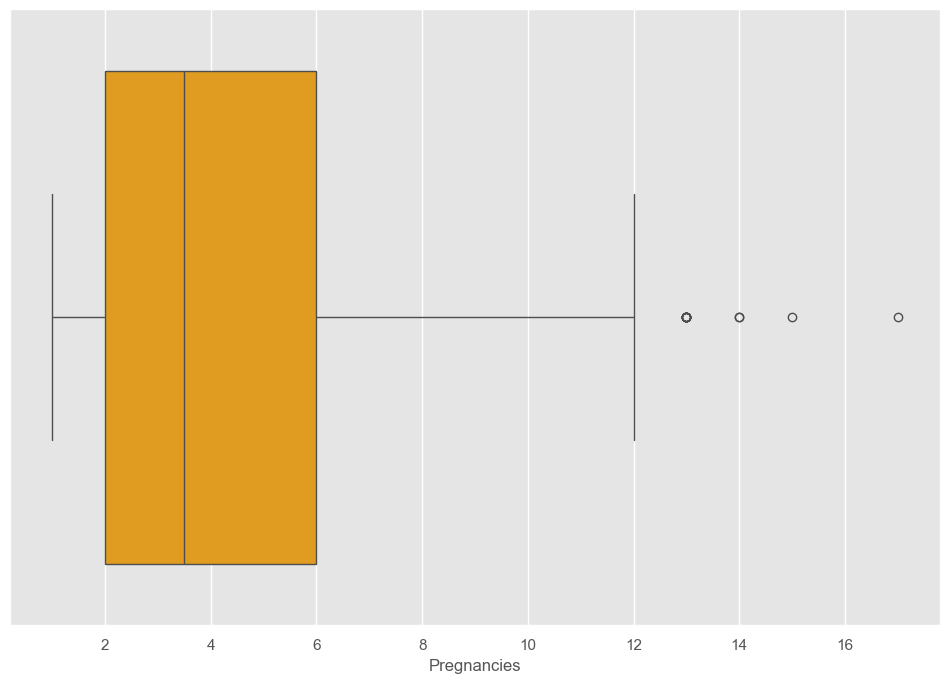

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x= df['Pregnancies'],color='orange')

In [ ]:
NewBMI = pd.Series(["Underweight","Normal","Overweight","Obesity 1","Obesity 2","Obesity 3"], dtype="category")


In [ ]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [ ]:
df['NewBMI'] = NewBMI
df.loc[df['BMI']<18.5,"NewBMI"] = NewBMI[0]
df.loc[(df['BMI']>18.5) & df['BMI']<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df['BMI']>24.9) & df['BMI']<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df['BMI']>29.9) & df['BMI']<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df['BMI']>34.9) & df['BMI']<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df['BMI']>39.9, "NewBMI"] = NewBMI[5]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,OutlierFlag_1,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0,Obesity 3


In [ ]:
def set_insulin(row):
    if row['Insulin'] >= 16 and row['Insulin'] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [ ]:
df=df.assign(NewInsulinScore=df.apply(set_insulin,axis=1))

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,OutlierFlag_1,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0,Obesity 3,Abnormal


In [ ]:
NewGlucose = pd.Series(['Low','Normal','Overweight','Secret','High'],dtype="category")
df['NewGlucose'] = NewGlucose

df.loc[df['Glucose'] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df['Glucose'] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df['Glucose'] > 99) & (df['Glucose'] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df['Glucose'] >126, "NewGlucose"] = NewGlucose[3] 


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,OutlierFlag_1,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,0,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,0,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,0,Obesity 2,Normal,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,0,Obesity 3,Abnormal,Secret


In [ ]:
df=pd.get_dummies(df,columns=['NewBMI','NewInsulinScore','NewGlucose'],drop_first= True,dtype=int)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
categorical_df = df[['NewBMI_Obesity 1','NewBMI_Obesity 2','NewBMI_Obesity 3','NewBMI_Overweight','NewBMI_Underweight','NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal','NewGlucose_Overweight','NewGlucose_Secret']]

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutlierFlag_0,...,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,0,1,0,0,0,0,0,0,0,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,1,...,0,1,0,0,0,0,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,...,0,1,0,0,0,1,0,1,0,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,1,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
y = df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1','NewBMI_Obesity 2','NewBMI_Obesity 3','NewBMI_Overweight','NewBMI_Underweight','NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal','NewGlucose_Overweight','NewGlucose_Secret'],axis=1)


In [ ]:
cols = X.columns
index=X.index

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,OutlierFlag_0,OutlierFlag_1
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,1,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,1,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


In [ ]:
from sklearn.preprocessing import RobustScaler
transformer=RobustScaler().fit(X)
X=transformer.transform(X)
X = pd.DataFrame(X,columns=cols,index=index)

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,OutlierFlag_0,OutlierFlag_1
0,0.625,0.770186,0.000,1.000000,0.981343,0.173184,0.671895,1.235294,0.0,0.0
1,-0.625,-0.795031,-0.375,0.142857,-0.018657,-0.608939,-0.049673,0.117647,0.0,0.0
2,1.125,1.639752,-0.500,0.571429,0.981343,-0.977654,0.789542,0.176471,0.0,0.0
3,-0.625,-0.695652,-0.375,-0.714286,-0.145522,-0.441341,-0.530719,-0.470588,0.0,0.0
4,0.375,0.496894,-2.000,1.000000,0.958955,1.234637,5.014379,0.235294,0.0,0.0


In [ ]:
X=pd.concat([X,categorical_df],axis=1)


In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,OutlierFlag_0,OutlierFlag_1,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.625,0.770186,0.000,1.000000,0.981343,0.173184,0.671895,1.235294,0.0,0.0,0,1,0,0,0,0,0,0,0,1
1,-0.625,-0.795031,-0.375,0.142857,-0.018657,-0.608939,-0.049673,0.117647,0.0,0.0,0,1,0,0,0,1,0,1,0,0
2,1.125,1.639752,-0.500,0.571429,0.981343,-0.977654,0.789542,0.176471,0.0,0.0,0,1,0,0,0,0,0,0,0,1
3,-0.625,-0.695652,-0.375,-0.714286,-0.145522,-0.441341,-0.530719,-0.470588,0.0,0.0,0,1,0,0,0,1,0,1,0,0
4,0.375,0.496894,-2.000,1.000000,0.958955,1.234637,5.014379,0.235294,0.0,0.0,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


Logistic Regression


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
log_reg_acc=accuracy_score(y_train,log_reg.predict(X_train))

In [ ]:
log_reg_acc=accuracy_score(y_test,log_reg.predict(X_test))

In [ ]:
confusion_matrix(y_test,y_pred)

array([[88,  8],
       [11, 45]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90        96
           1       0.85      0.80      0.83        56

    accuracy                           0.88       152
   macro avg       0.87      0.86      0.86       152
weighted avg       0.87      0.88      0.87       152



KNN

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy_score(y_train,knn.predict(X_train))

0.8733552631578947

In [ ]:
knn_acc=accuracy_score(y_test,knn.predict(X_test))

In [ ]:
confusion_matrix(y_test,y_pred)

array([[87,  9],
       [ 9, 47]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        96
           1       0.84      0.84      0.84        56

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



SVM

In [ ]:
svc = SVC(probability = True)
parameter={
    'gamma':[0.0001,0.001,0.01,0.1],
    'C':[0.01,0.05,0.5,1,10,15,20]
}

grid_search = GridSearchCV(svc,parameter)
grid_search.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [ ]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [ ]:
grid_search.best_score_

np.float64(0.8585015580544642)

In [ ]:
svc = SVC(C=15,gamma =0.01,probability = True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

print(accuracy_score(y_train,svc.predict(X_train)))
svc_acc = accuracy_score(y_test,svc.predict(X_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8947368421052632
[[91  5]
 [12 44]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91        96
           1       0.90      0.79      0.84        56

    accuracy                           0.89       152
   macro avg       0.89      0.87      0.88       152
weighted avg       0.89      0.89      0.89       152



Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print(accuracy_score(y_train,dt.predict(X_train)))
dt_acc=(accuracy_score(y_test,dt.predict(X_test)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

1.0
[[85 11]
 [10 46]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        96
           1       0.81      0.82      0.81        56

    accuracy                           0.86       152
   macro avg       0.85      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [ ]:
grid_param = {
    'criterion': ['gini','entropy'],   
    'max_depth': [3,5,7,10],
    'min_samples_split': [1,2,3,5,7],
    'min_samples_leaf': [1,2,3,5,7],
    'max_features': ['auto','sqrt','log2']
}

grid_search_dt = GridSearchCV(dt, grid_param, cv=50, n_jobs=1, verbose=1)
grid_search_dt.fit(X_train, y_train)


Fitting 50 folds for each of 600 candidates, totalling 30000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7]},
             verbose=1)

In [ ]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 7}

In [ ]:
grid_search.best_score_

np.float64(0.8585015580544642)

In [ ]:
dt = grid_search_dt.best_estimator_
y_pred = dt.predict(X_test)
print(accuracy_score(y_train,dt.predict(X_train)))
dt_acc = accuracy_score(y_test,dt.predict(X_test))
print(dt_acc)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.930921052631579
0.8486842105263158
[[84 12]
 [11 45]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        96
           1       0.79      0.80      0.80        56

    accuracy                           0.85       152
   macro avg       0.84      0.84      0.84       152
weighted avg       0.85      0.85      0.85       152



In [ ]:
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [ ]:
y_pred = rand_clf.predict(X_test)

In [ ]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9950657894736842
0.9078947368421053
[[89  7]
 [ 7 49]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        96
           1       0.88      0.88      0.88        56

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [ ]:
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [ ]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [ ]:
grid_search_gbc.best_score_

np.float64(0.894672131147541)

In [ ]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9967105263157895
0.8881578947368421
[[88  8]
 [ 9 47]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        96
           1       0.85      0.84      0.85        56

    accuracy                           0.89       152
   macro avg       0.88      0.88      0.88       152
weighted avg       0.89      0.89      0.89       152



In [ ]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9786184210526315
0.868421052631579
[[88  8]
 [12 44]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        96
           1       0.85      0.79      0.81        56

    accuracy                           0.87       152
   macro avg       0.86      0.85      0.86       152
weighted avg       0.87      0.87      0.87       152



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier',
              'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc, 4), 
              100*round(knn_acc, 4), 
              100*round(svc_acc, 4), 
              100*round(dt_acc, 4), 
              100*round(rand_acc, 4), 
              100*round(gbc_acc, 4), 
              100*round(xgb_acc, 4)]
})
models

,Model,Score
0,Logistic Regression,87.50
1,KNN,88.16
2,SVM,88.82
3,Decision Tree Classifier,84.87
4,Random Forest Classifier,90.79
5,Gradient Boosting Classifier,88.82
6,XgBoost,86.84


In [ ]:
import pickle
model = gbc_acc
pickle.dump(model, open("diabetes.pkl",'wb'))

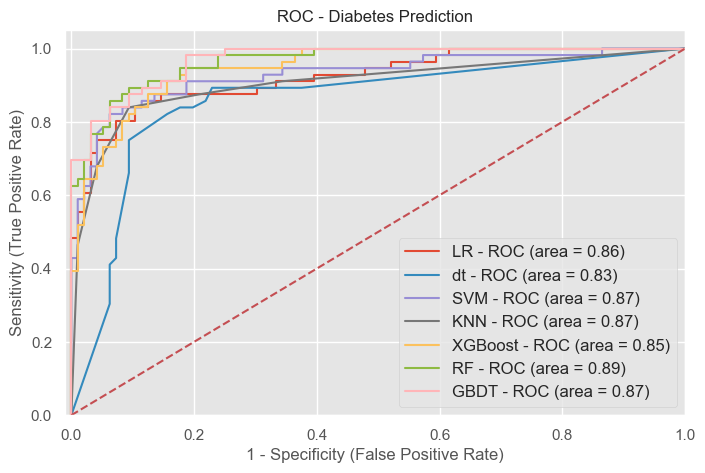

In [ ]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'dt',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[87.5, 84.87, 88.82, 88.16000000000001, 86.83999999999999, 90.79, 88.82]
[np.float64(86.00999999999999), np.float64(85.64), np.float64(86.68), np.float64(87.28), np.float64(85.11999999999999), np.float64(89.21), np.float64(87.28)]


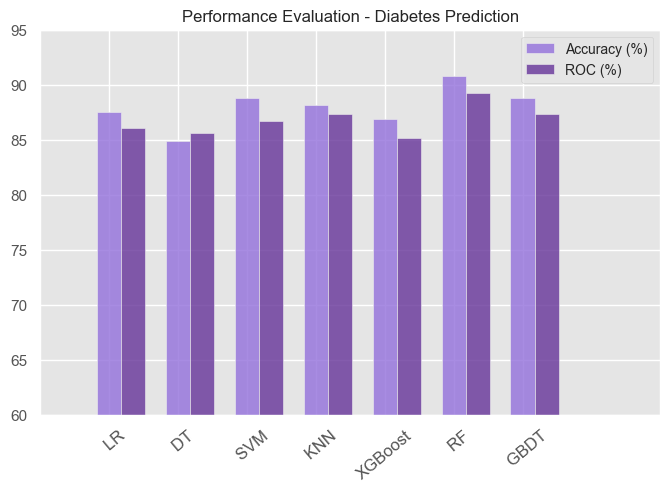

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': log_reg,
},
{
    'label': 'DT',
    'model': dt,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(log_reg_acc,4), 100*round(dt_acc,4), 100*round(svc_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# create plot
fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([60, 95])

plt.title('Performance Evaluation - Diabetes Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()